In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

FILE = '../../data/dataset.csv'
df = pd.read_csv(FILE,sep=',')
Inputs = df['Inputs']
Directions = df['Directions'].values
Energy = df['Energy'].values
df.head()

,Inputs,Directions,Energy
0,HHHHP,SRRRL,1
1,HHHHP,SRRRF,1
2,HHHHP,SRLLR,1
3,HHHHP,SRLLF,1
4,HHHHP,SLRRL,1


In [4]:
dic = {}
for i,input in enumerate(Inputs):
    try:
        dic[input].append([Directions[i],Energy[i]])
    except:
        dic[input] = [[Directions[i],Energy[i]]]

data = {}

for key in dic.keys():
    max_energy = 0
    for _,energy in dic[key]:
        if max_energy < energy: 
            max_energy = energy
    data[key] = {'energy':max_energy,'directions':[]}

values = []

for key in dic.keys():
    for dir,energy in dic[key]:
        if energy == data[key]['energy']:
            data[key]['directions'].append(dir)
            values.append([key,dir])

In [5]:
vals = pd.DataFrame(values,columns=['Inputs','Directions'])
vals.head()

,Inputs,Directions
0,HHHHP,SRRRL
1,HHHHP,SRRRF
2,HHHHP,SRLLR
3,HHHHP,SRLLF
4,HHHHP,SLRRL


In [6]:
def solutions(input):
    solutions = list(vals.loc[vals['Inputs']==input]["Directions"])
    return solutions
    
def verifica_probs(input):
    number_solutions = len(vals.loc[vals['Inputs']==input])
    size = len(input)
    total = 3**(size-1)
    prob = number_solutions/total
    return prob


verifica_probs("HHHHP")

0.14814814814814814

In [7]:
from decision_tree import model

In [8]:
def calculate_prob(input,N):
    results = []
    count = 0
    list_solutions = solutions(input)
    number_solutions = len(list_solutions)
    for i in range(N):
        results.append(model(input))
    for i in range(N):
        for j in range(number_solutions):
            if results[i] == list_solutions[j]:
                count +=1
                break
    prob = count/N
    return prob
        
calculate_prob("HHHHP",1000)


0.188

In [9]:
np.random.seed(42)
aux = pd.DataFrame(dic.keys())
aux['len'] = aux[0].apply(len)
combinations = []
for i in [5,6,7,8]:
    combinations += list(np.random.choice(aux.loc[aux['len'] == i][0].values,3))
combinations

['HPHHP',
 'HHPHP',
 'PHPHH',
 'HHPHHP',
 'HPPHHP',
 'HPHPPH',
 'PPPHPHH',
 'PHPPPHH',
 'PHPPPHH',
 'HPHPPPHH',
 'PHHHHHPH',
 'HPPHPHPH']

In [10]:
Prandom = []
Pmodel = []
for combination in combinations:
    Prandom.append(verifica_probs(combination)) 
    N = 3**(len(combination)-1)*2
    N = 1000 if N < 1000 else 3**(len(combination)-1)*2
    Pmodel.append(calculate_prob(combination,N))
    print(f'Random: {Prandom[-1]} - Model: {Pmodel[-1]} Samples: {N}')

Random: 0.14814814814814814 - Model: 0.215 Samples: 1000
Random: 0.14814814814814814 - Model: 0.186 Samples: 1000
Random: 0.14814814814814814 - Model: 0.189 Samples: 1000
Random: 0.24691358024691357 - Model: 0.318 Samples: 1000
Random: 0.14814814814814814 - Model: 0.199 Samples: 1000
Random: 0.024691358024691357 - Model: 0.043 Samples: 1000
Random: 0.13168724279835392 - Model: 0.1934156378600823 Samples: 1458
Random: 0.0411522633744856 - Model: 0.03292181069958848 Samples: 1458
Random: 0.0411522633744856 - Model: 0.03223593964334705 Samples: 1458
Random: 0.00823045267489712 - Model: 0.009830818472793781 Samples: 4374
Random: 0.05212620027434842 - Model: 0.0797896662094193 Samples: 4374
Random: 0.0027434842249657062 - Model: 0.009602194787379973 Samples: 4374


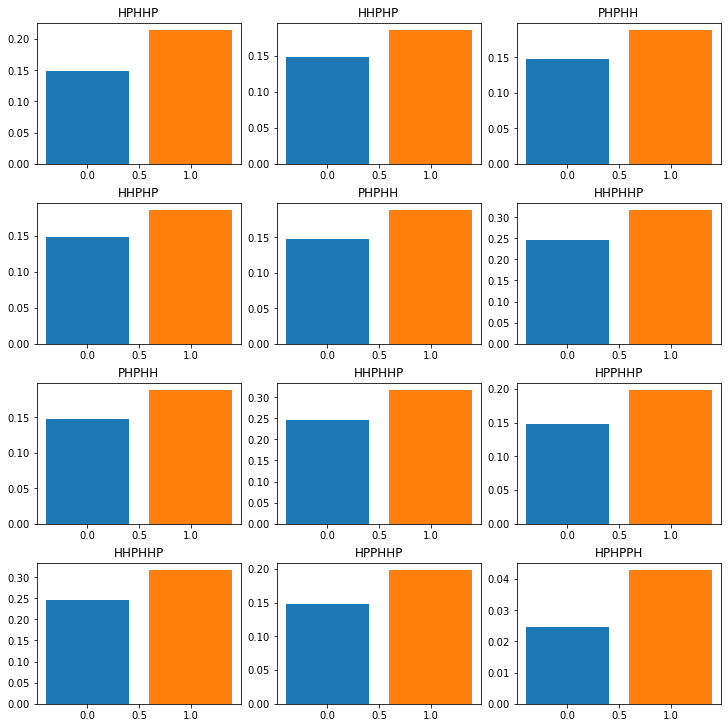

In [11]:
testes = combinations
fig,ax = plt.subplots(4,3,figsize=(10,10),constrained_layout=True)
for i in range(4):
    for j in range(3):
        ax[i][j].bar(0,Prandom[i+j])
        ax[i][j].bar(1,Pmodel[i+j])
        ax[i][j].set_title(testes[i+j])